<a href="https://colab.research.google.com/github/Pemi-adekanmi/Kowope-Mart-Loan-Default-Prediction/blob/main/Kowope_Mart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing Necessary Libraries**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, plot_confusion_matrix, plot_roc_curve
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from rgf import RGFClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [9]:


!pip install catboost rgf_python

In [ ]:
import catboost

In [10]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [11]:
train.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,11333126.0,4397256.0,2301324.0,7875694.0,96375139,112181765.0,1.0,1.0,1.0,3.0,3.0,134.655,NaN,NaN,134.655,4000.5,17064.0,11376.0,60.0,17064.0,5962.0,NaN,1052.0,8.0000,2.0,NaN,12.0,12.0,4.0,0.0,NaN,NaN,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,2533168.0,244292.0,3982971.0,2141445.0,28141427,45169902.0,1.0,1.0,1.0,2.0,2.0,109.230,11385.24,14584.29,86.685,4161.0,13413.0,8942.0,304.0,13413.0,5780.0,NaN,2554.0,17.5000,0.0,0.0,16.0,24.0,8.0,0.0,NaN,NaN,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,1079864.0,NaN,NaN,0.0,16576457,22452691.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1597.5,4746.0,3164.0,60.0,15696.0,NaN,14508.0,70.0,0.6666,0.0,NaN,12.0,0.0,6.0,0.0,149.6805,NaN,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,3621979.0,NaN,771776.0,1186839.0,48187375,136297820.0,0.0,0.0,0.0,1.0,1.0,120.120,8580.00,0.00,85.800,1701.0,4014.0,2676.0,60.0,11679.0,NaN,NaN,522.0,7.8334,1.0,1.0,4.0,8.0,4.0,1.0,NaN,NaN,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,no
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,361770.0,396391.0,818456.0,511535.0,28141427,15292757.0,0.0,0.0,0.0,3.0,3.0,104.535,8360.19,10326.45,115.335,1551.0,3285.0,2190.0,60.0,19437.0,12958.0,5202.0,272.0,1.0000,0.0,0.0,24.0,2.0,24.0,0.0,150.0135,NaN,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,no


In [12]:
test.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,0.0,1649749.0,5446.0,0.0,48187375,114686147.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1086.0,6204.0,2676.0,60.0,14691.0,9794.0,NaN,238.0,1.8334,0.0,NaN,22.0,2.0,14.0,0.0,NaN,NaN,0.825000,1.01,0.800000,NaN,0.0,charge,NaN,0.000000,0.011221
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,18308285.0,622789.0,1025793.0,1396510.0,34694910,87479487.0,1.0,1.0,1.0,2.0,2.0,142.560,NaN,NaN,570.585,3082.5,10221.0,6814.0,60.0,11955.0,3528.0,NaN,1216.0,19.5000,3.0,NaN,30.0,18.0,14.0,2.0,NaN,18.8415,0.507694,4.04,0.623248,1.0,0.0,lending,NaN,0.504974,0.043525
2,Apcnt_1000052,NaN,0.27505,0.0600,0.0000,0.0,NaN,NaN,NaN,NaN,0.0,118256.0,NaN,NaN,21973443,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,852.0,4836.0,NaN,NaN,NaN,7.8334,0.0,NaN,2.0,NaN,0.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,charge,NaN,0.000000,NaN
3,Apcnt_1000076,3232.0,0.28505,2.8032,0.0000,0.0,0.0,473802.0,473802.0,1724437.0,493641.0,1391064.0,1176725.0,1220293.0,16576457,NaN,2.0,2.0,2.0,3.0,3.0,109.005,13050.00,NaN,109.005,1414.5,4197.0,2798.0,60.0,14964.0,NaN,NaN,248.0,9.0000,1.0,1.0,36.0,0.0,26.0,0.0,NaN,NaN,0.916663,2.02,0.464224,NaN,NaN,charge,90.163742,0.788809,0.104029
4,Apcnt_1000080,3466.0,2.09545,0.8318,2.5182,0.0,19839.0,1150662.0,1150662.0,7860523.0,5752921.0,271133.0,613064.0,4779643.0,48187375,72049802.0,0.0,0.0,0.0,3.0,3.0,139.065,469.29,469.29,15.180,2724.0,9855.0,6570.0,182.0,11679.0,5900.0,NaN,2388.0,16.6666,1.0,0.0,24.0,28.0,20.0,0.0,NaN,NaN,0.234047,23.23,0.726688,0.0,0.0,lending,1303.587148,1.637733,0.163124


## **Data Cleaning**

Checking missing values % for each column in train data

In [ ]:

mv_train = train.isna().sum().transform(lambda x:x/train.shape[0]).sort_values().plot.barh(figsize=(16, 12), title='% missing values (Train)', color='purple', alpha=.8)
for i in mv_train.patches:
    mv_train.text(i.get_width()+0.005, i.get_y(), str(int(round(i.get_width(), 2)*100)) + '%', fontsize=13, color='indigo', alpha=1)



Checking missing values % for each column in test data

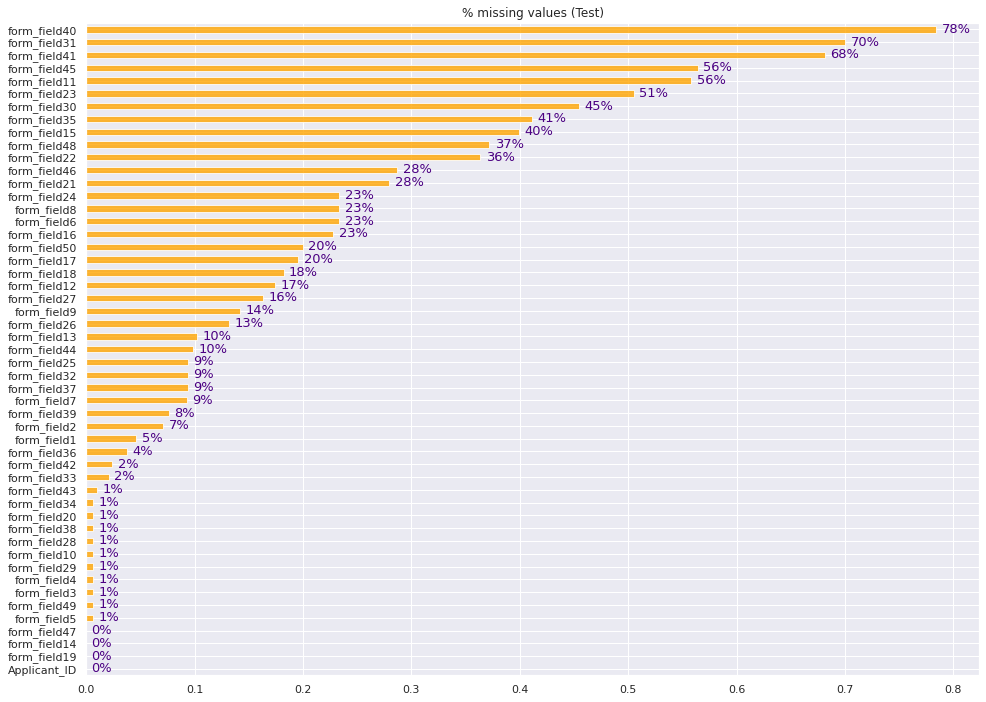

In [14]:

mv_test = test.isna().sum().transform(lambda x:x/test.shape[0]).sort_values().plot.barh(figsize=(16, 12), title='% missing values (Test)', color='orange', alpha=.8)
for i in mv_test.patches:
    mv_test.text(i.get_width()+0.005, i.get_y(), str(int(round(i.get_width(), 2)*100)) + '%', fontsize=13, color='indigo', alpha=1)

In [16]:
encoder = LabelEncoder()

In [17]:
# A function to print train and validation score and also return the validation score of a model

def model_auc(model):
    train_auc = roc_auc_score(y_train, model.predict_proba(x_train)[:, 1])
    test_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])
    print("Train AUC : {} \t Val AUC : {}".format(train_auc, test_auc))
    return test_auc

Filling missing values with -999

In [19]:
features = train.columns.drop(['Applicant_ID', 'default_status'])
X = pd.get_dummies(train[features])
X.fillna(-999, inplace=True)
y = train.default_status

test_x = pd.get_dummies(test[features])
test_x.fillna(-999, inplace=True)


# Model: Voting Classifier for ensembling models
The Voting Classifier consists of two catboosts, two regularized greedy forests, two random forests with a seed value of 32 for random state. All in stratified KFold of 30 splits.

In [20]:

scores = []
preds = []

seed = 32
 
Vc = VotingClassifier(estimators=[
('cat',  CatBoostClassifier(verbose=False, thread_count=-1, random_state=seed)), 
('rgf', RGFClassifier()), ("rgf1", RGFClassifier(algorithm="RGF_Sib")), ('cat1', CatBoostClassifier(bagging_temperature = 0.8609895558337871, border_count=116, depth=5, iterations=270, l2_leaf_reg=3, 
                         learning_rate=0.07085617391173239, random_strength=0.08820672130534879, random_state=seed, scale_pos_weight=0.390675124341283, verbose=False, thread_count=-1)), 
('rg',RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=seed)), ('rg1', RandomForestClassifier(n_estimators=700, n_jobs=-1, random_state=seed))], 
voting="soft", weights=[3, 1.5,1.5,1,1,1])
 
skf = StratifiedKFold(n_splits=30, shuffle=True, random_state=seed) 
 
i = 30
for train_index, test_index in skf.split(X, y):
    print("Number of splits left {0} to train.".format(i))
    x_train, x_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    pipe = Pipeline([("SC", MinMaxScaler()), ("clf", Vc)])
    pipe.fit(x_train, y_train)
    score = roc_auc_score(y_test, pipe.predict_proba(x_test)[:, 1])
    scores.append(score) 
    pred = pipe.predict_proba(test_x)[:, 1]
    preds.append(pred)
    print(score)
    i -= 1
 
np.mean(scores)  

Number of splits left 30 to train.
0.8396573397271754
Number of splits left 29 to train.
0.8467169483371355
Number of splits left 28 to train.
0.8421962537051694
Number of splits left 27 to train.
0.8225600198643637
Number of splits left 26 to train.
0.8373062060617347
Number of splits left 25 to train.
0.8613436379719727
Number of splits left 24 to train.
0.8475068671725872
Number of splits left 23 to train.
0.8461101541040086
Number of splits left 22 to train.
0.8358908701522416
Number of splits left 21 to train.
0.846377081490448
Number of splits left 20 to train.
0.8206573862842776
Number of splits left 19 to train.
0.8492884522867297
Number of splits left 18 to train.
0.8250182348650621
Number of splits left 17 to train.
0.82664928534848
Number of splits left 16 to train.
0.8499402517187331
Number of splits left 15 to train.
0.8610554110970958
Number of splits left 14 to train.
0.826393645342945
Number of splits left 13 to train.
0.8337481133449658
Number of splits left 12 to trai

0.8419127313509851

In [21]:
sample = pd.read_csv('SampleSubmission.csv')

sample['default_status'] = np.mean(preds, axis=0)

In [26]:
sample['default_status'].round(1)

0        0.3
1        0.3
2        0.4
3        0.7
4        0.2
        ... 
23995    0.6
23996    0.3
23997    0.3
23998    0.5
23999    0.2
Name: default_status, Length: 24000, dtype: float64

In [34]:
sample['default_status'] = sample['default_status'].round()

In [35]:
Prediction = pd.DataFrame({'Applicant_ID':sample.Applicant_ID, 'Default_status':sample['default_status']})

In [37]:
Prediction

,Applicant_ID,Default_status
0,Apcnt_1000032,0.0
1,Apcnt_1000048,0.0
2,Apcnt_1000052,0.0
3,Apcnt_1000076,1.0
4,Apcnt_1000080,0.0
...,...,...
23995,Apcnt_999940,1.0
23996,Apcnt_999956,0.0
23997,Apcnt_999976,0.0
23998,Apcnt_999984,0.0
